In [1]:
import numpy as np
import matplotlib.pyplot as plt
from preprocessing import subsample_point_cloud, create_digital_elevation_model

In [2]:
las = subsample_point_cloud('../data/cloud_merged.las', factor=10)

# Normalize the point cloud
x = las.x - np.mean(las.x)
y = las.y - np.mean(las.y)
z = las.z - np.mean(las.z)

print(np.min(x), np.max(x))
print(np.min(y), np.max(y))
print(np.min(z), np.max(z))

-117.85452579770936 145.09227420232492
-225.99950287118554 310.2865971289575
-7.934529861777719 8.872770138222222


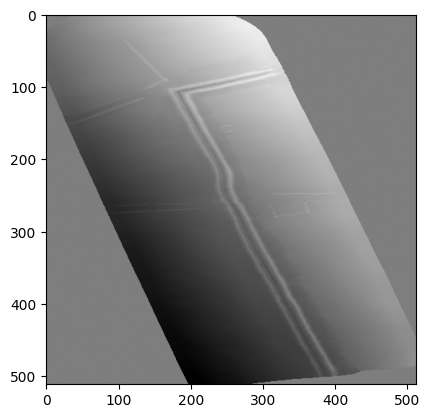

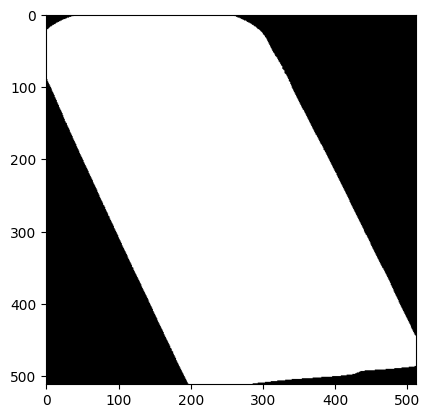

In [ ]:
dem, mask = create_digital_elevation_model(x,y,z, threshold_down=-7, threshold_up=8)

plt.imshow(np.load('dem.npz')['dem'], cmap='gray') 
plt.show()
plt.imshow(np.load('dem.npz')['mask'], cmap='gray') 
plt.show()
